In [ ]:
import pandas as pd
from fbprophet import Prophet 

In [ ]:
path = '/content/drive/MyDrive/ABCLABS/전북DLI/전북김제.xlsx'
#path = '/content/drive/MyDrive/ABCLABS/전북진안.xlsx'
data = pd.read_excel(path, sheet_name = '계산')

In [ ]:
df = data.loc[:,['dates','DLI']]
df["dates"] = pd.to_datetime(df["dates"])
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2016-01-01,10.752194
1,2016-01-02,10.365014
2,2016-01-03,15.690333
3,2016-01-04,13.557667
4,2016-01-05,9.063833


In [ ]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

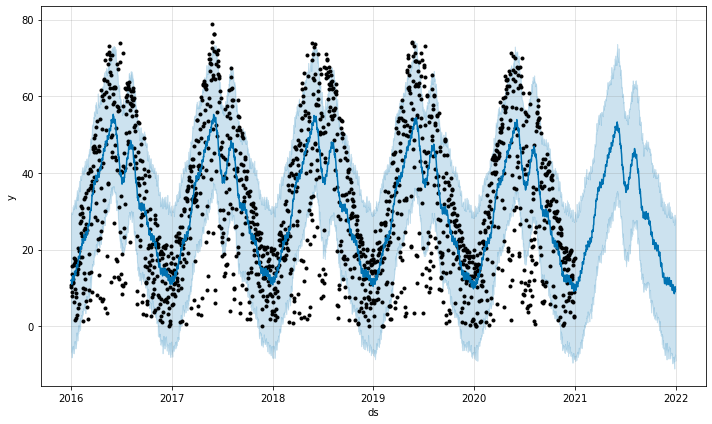

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
forecast.tail()
result = forecast
result.to_excel('2021년_전북진안_DLI예측(가중치X).xlsx') 

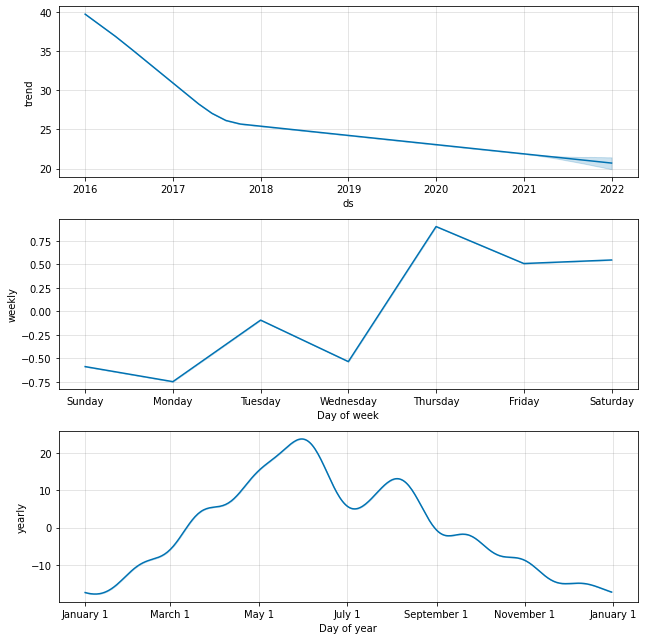

In [ ]:
fig2 = m.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


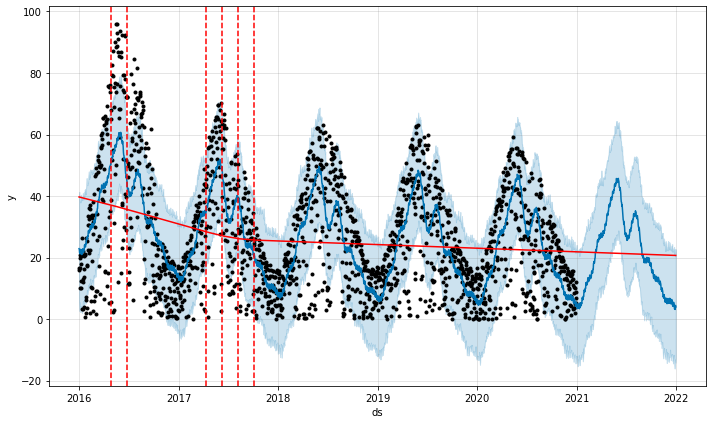

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
m = Prophet(changepoint_prior_scale=0.05)
m.fit(df)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

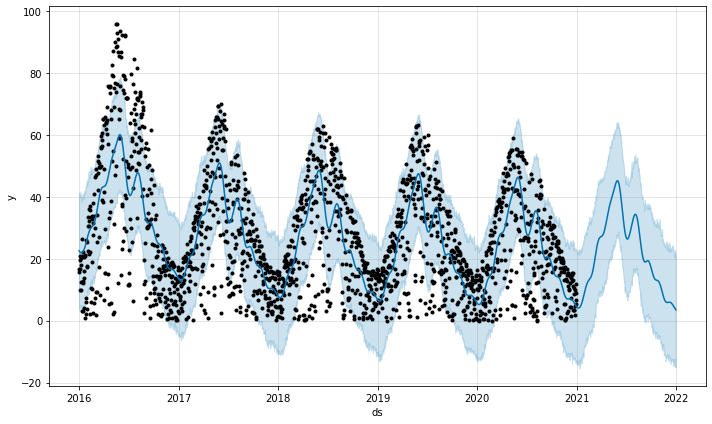

In [ ]:
 m = Prophet(
    # trend
    changepoint_prior_scale=0.05,
    # seasonality
    weekly_seasonality=False,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='additive'
)

m.fit(df)
forecast = m.predict(future)
fig1 = m.plot(forecast)



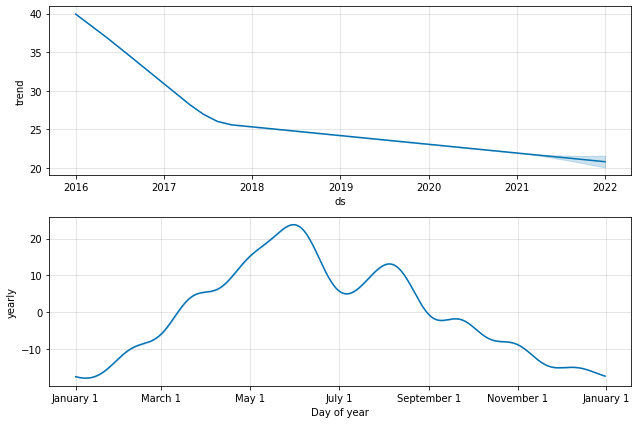

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2185,2021-12-27,20.825572,-14.260025,21.656095,19.840721,21.798626,-16.598836,-16.598836,-16.598836,0.089234,0.089234,0.089234,-16.688070,-16.688070,-16.688070,0.0,0.0,0.0,4.226737
2186,2021-12-28,20.822478,-13.871917,21.876365,19.833352,21.799796,-16.314714,-16.314714,-16.314714,0.514223,0.514223,0.514223,-16.828937,-16.828937,-16.828937,0.0,0.0,0.0,4.507764
2187,2021-12-29,20.819383,-14.367504,23.175906,19.825982,21.799478,-16.234311,-16.234311,-16.234311,0.730567,0.730567,0.730567,-16.964878,-16.964878,-16.964878,0.0,0.0,0.0,4.585072
2188,2021-12-30,20.816288,-14.127479,23.156181,19.818633,21.798888,-16.799929,-16.799929,-16.799929,0.294508,0.294508,0.294508,-17.094437,-17.094437,-17.094437,0.0,0.0,0.0,4.016360
2189,2021-12-31,20.813194,-13.405580,22.701218,19.812137,21.799945,-17.734205,-17.734205,-17.734205,-0.518015,-0.518015,-0.518015,-17.216189,-17.216189,-17.216189,0.0,0.0,0.0,3.078989


In [ ]:
result = forecast.loc[:,['ds','yhat']]
result = result[-365:]
result.columns = ['dates', 'DLI']
result.head()

,dates,DLI
1825,2021-01-01,4.103211
1826,2021-01-02,5.071961
1827,2021-01-03,5.752966
1828,2021-01-04,5.380147
1829,2021-01-05,3.984867


In [ ]:
#result.to_excel('2021년_전북김제_DLI예측.xlsx')
result.to_excel('2021년_전북진안_DLI예측.xlsx') 